In [1]:
#!pip install randomcolor 
import randomcolor # see: https://pypi.org/project/randomcolor/
#!pip install gif
import gif # see https://github.com/maxhumber/gif
#!pip install reverse_geocoder
import reverse_geocoder as rg # see ttps://pypi.org/project/reverse_geocoder/

import numpy as np

# plotting
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import cm, colors

# 3d
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# everything below is used to color the globe
from mpl_toolkits.basemap import Basemap
import json
import requests

# from local helpers file
from helpers import domino, getpatches, getquadrature, color_land, color_country

In [2]:
@gif.frame
def myplot(color,quadrature, filename, angle=30):
    
    patches = getpatches(color,quadrature) # Get the hexagons 
    
    fig = plt.figure(figsize=plt.figaspect(1)*2,constrained_layout=False) 
    ax = fig.gca(projection='3d')
    
    # Visualize each hexagon, that is given in "color". A color is computed
    # for the center of the hexagon and then applied for the full hexagon
    ax.add_collection3d(Poly3DCollection(patches,facecolor = color,linewidth=0.1,edgecolor=color))
        
    # Some styling
    l = 0.6
    plt.axis("off")
    ax.set_xlim([-l,l]), ax.set_ylim([-l,l]),ax.set_zlim([-l,l])
    ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.tight_layout()
    ax.view_init(30, angle)
    fig.savefig(filename)

In [3]:
# pick the number of cells on the globe from this list
# [92, 492, 1212, 2252, 3612, 5292, 7292, 9612, 12252, 15212]
nq = 2252
quadrature = getquadrature(nq)

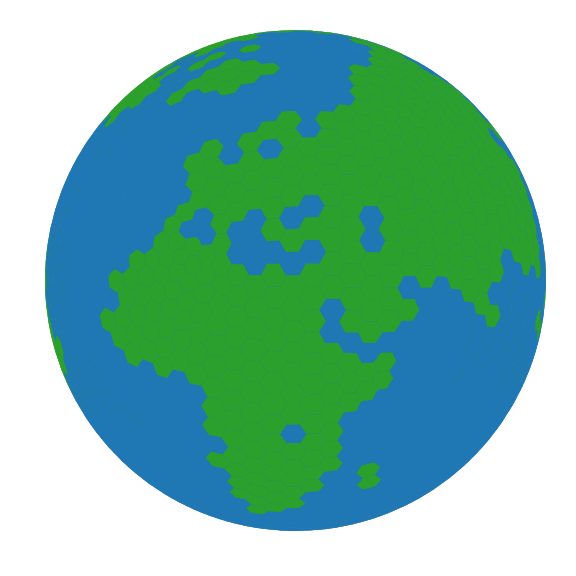

In [4]:
# plot the earth 
colors  = color_land(quadrature)
myplot(colors,quadrature,"earth.png")

Loading formatted geocoded file...


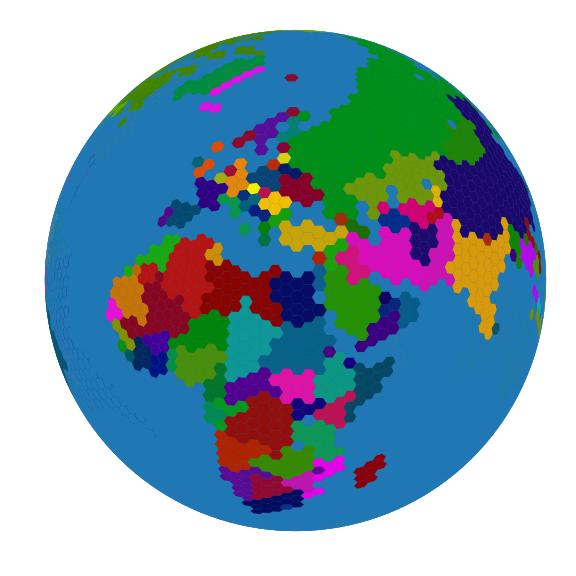

In [5]:
# higher resolution to plot countries
nq = 7292
quadrature = getquadrature(nq)
colors  = color_country(quadrature)
myplot(colors,quadrature,"earth_country.png")


In [ ]:
# lowert resolution for gif
nq = 7292
quadrature = getquadrature(nq)
colors  = color_land(quadrature)

frames = []
nframes = 20 # the more, the slower 
for i,angle in enumerate(np.linspace(0,360,nframes)[:-1]):
    print(i,end=",")
    frames.append(myplot(colors,quadrature,"tmp.png",angle=angle))

gif.save(frames,"spinning_earth.gif")

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,